<center><h1>QBUS6840 - Predictive Analytics </h1></center>

# Tutorial 1 - Working with Time-Series
 
### Objectives

1. Get familiar with Dates and Times in Python
2. Get familiar with Pandas Time Series indexing
3. Learn concepts of plotting and visualization


While Python provides a lot of general functionality, it does not provide any more specific functionalities for data manipulation and visualisation. Therefore, we must use external libraries to get this functionality.

Fortunately, Anaconda pre-installs the relevant libraries for us. They are:
- **Numpy** (mathematics and scientific functions)
- **Pandas** (data manipulation)
- **Matplotlib** (visualization)

`Pandas` was developed in the context of financial modelling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.

In this section, we will introduce how to work with each of these types of date/time data in Pandas. This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series. 

We will start with a brief discussion of the tools for dealing with dates and times in Python, provided by Pandas. After listing some resources that go into more depth, we will review some short examples of working with time series data in Pandas.

## 1. Importing libraries
Create a new Python script for this tutorial called ***tutorial_01.ipynb***. Start with the
following code

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The `import` keyword makes the pandas library available, which we can reference as the variable `pd`. We also import `numpy` and `matplotlib.pyplot` as `plt` and `np`, respectivly.

## 2. Dates and times in Native Python and Numpy
Python's basic objects for working with dates and times reside in the built-in `datetime` module. Along with the third-party dateutil module, you can use it to quickly perform a host of useful functionalities on dates and times. For example, you
can manually build a date using the datetime type:

In [13]:
from datetime import datetime
date = datetime(year=2022, month=2, day=21)

Now can you check what type the variable date is by typing the following code:

In [14]:
type(date)

datetime.datetime

This tells us that each variable in Python must have a type. Knowing the types of variables is very important in programming.

Or, using the `dateutil` module, you can parse dates from a variety of string formats:

In [15]:
from dateutil import parser
date = parser.parse("21th of February, 2022")

As you can see, this method is much smarter. You don’t need tell Python which year, which month and which date. The parser gets understand the sequence of statement **"21th of February, 2022"**. Once you have a `datetime` object, you can do things like printing the day of the week:

In [16]:
# date.strftime('%A')
# date.strftime('%B')
# date.strftime('%C')
# date.strftime('%D')


The weaknesses of Python's `datetime` format inspired the NumPy team to add a set of native time series data type to `NumPy`. The `datetime64` dtype encodes dates as **64-bit** integers, and thus allows arrays of dates to be represented compactly. The `datetime64` requires a very specific input format:

In [17]:
date = np.array('2022-02-21', dtype=np.datetime64)

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the type of this variable `date`?

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [18]:
print(date + np.arange(12))

['2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24' '2022-02-25'
 '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01' '2022-03-02'
 '2022-03-03' '2022-03-04']


As you can see, you can create a number of dates from a single date

## 3. Dates and times in Pandas

`Pandas` builds upon all the tools just discussed to provide `Timestamp` object, which combines the ease-of-use of `datetime` and `dateutil` with the efficient storage and vectorized interface of `numpy.datetime64`.

From a group of these `Timestamp` objects, `Pandas` can construct a `DatetimeIndex` that can be used to index data in a `Series` or `DataFrame`; we'll see many examples of this below.

For example, we can use `Pandas` to parse a flexibly formatted string date, and use format codes to output the day of the week:

In [19]:
date = pd.to_datetime("21th of February, 2022")  
date.strftime('%A')

'Monday'

`pd.to_datetime` is a parser converting a piece of text to a `Timestamp` object. We can use `type()` function to check if the `date` variable is a `Timestamp` object.

In [20]:
type(date)

pandas._libs.tslibs.timestamps.Timestamp

**Note**: We can only call the `strftime()` function from a `Timestamp` object as `strftime()` is defined as a method of the `Timestamp` class. If you are not familiar with class and method concepts, just keep in mind that there are some functions are designed to work only with particular data types. In our example, `Timestamp` is a special data type. 

#### Question:
- What is the meaning of `strftime` for a `datetime` variable?
- What is the meaning of `'%A'`?

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="docs.png"> <h3 style="padding-top: 0px;">Documentation - strftime() and strptime() Behavior </h3></div>

https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior.

Additionally, we can do NumPy-style vectorized operations directly on this same object using `to_timedelta()` function.

In [21]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', freq=None)

In here, `'D'` represents **'Days'** which denotes the time unit. You can also try different units such as `'W'`, `'h'` , `'T'` and then compare the corresponding outputs.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="docs.png"> <h3 style="padding-top: 0px;">Documentation - pandas.to_timedelta </h3></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_timedelta.html

## 4. Pandas Time Series: Indexing by Time

`Series` is a **one-dimensional** `ndarray` data type in `Pandas`. `Series` is useful when we want to index data by `timestamps` indices. For example, first we create a `Series` object with 4 elements as:

In [22]:
series_noindex = pd.Series([1, 2, 3, 4])
series_noindex   # Or print(series_noindex)

0    1
1    2
2    3
3    4
dtype: int64

In Jupyter Notebook, we can quickly see the value of a variable by simply writing it out , or puttingthe variable inside the `print()` function. We can see that the `series_noindex` Series is indexed by **unique** integers from 0,1,2,etc. In time series analysis, it is often the case that we want to using date time values to index the observations.

Now we construct another `Series` object that has time indexed data:

In [23]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
date_timeindex = pd.Series([1, 2, 3, 4], index=index)
date_timeindex # or print(date_timeindex)

2014-07-04    1
2014-08-04    2
2015-07-04    3
2015-08-04    4
dtype: int64

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Check the index of `date_timeindex`. Have you seen the difference from the index of `series_noindex`?

Now that we have this data in a `Series`, we can make use of any of the `Series` indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [24]:
date_timeindex['2014-07-04':'2015-07-04']
# from a to b

2014-07-04    1
2014-08-04    2
2015-07-04    3
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year:

In [26]:
date_timeindex['2015']

2015-07-04    3
2015-08-04    4
dtype: int64

## 5. Play with real data: *AirPassengers* dataset

Since you have learnt the basics of processing the date and time in Python, now let’s use Python to visualize some real time series data.

Time Series data is a collection of data points collected at constant time intervals. These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis. But what makes a Time Series different from say a regular regression problem? There are 2 things:
- It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

Because of the inherent properties of a Time Series, there are various steps involved in analyzing it. These are discussed in detail below. Let’s start by loading a Time Series object in Python. We’ll be using the popular **AirPassengers** data set which can be downloaded from Canvas.

### 5.1 Loading the dataset

Before you start loading the dataset, please make sure you have successfully load the necessary libraries `Numpy`, `Pandas`, and `matplotlib`. If you haven’t do so, please go back to step 1. 

To simplify the dat loading step, we should store the data file in the same directory where we save this jupyther notebok. Then we can load the data set and look at some initial rows and data types of the columns:

In [31]:
data = pd.read_csv('AirPassengers.csv')
print(data.head(8))
print( '\n Data Types:')
print(data.dtypes)

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
5  1949-06         135
6  1949-07         148
7  1949-08         148

 Data Types:
Month         object
Passengers     int64
dtype: object


The data contains a particular month and number of passengers travelling in that month. But this is still not read as a Time Series object as the data types are `object` and `int`. (Recall how to check type information?)

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the type of the variable data?
- How many columns in the DataFrame variable data?
- What are the index values? Is this in a good time series format?

In order to read the data as a time series, we should specify the index column as `datetime` index. Carefully read the code below and ask your questions until you fully understand the meaning of each statement.

In [41]:
data_time = pd.read_csv('AirPassengers.csv')           # Load data and set the Month column as the index column
data_time['Month']=pd.to_datetime(data_time['Month'])  # Parse the Month column to datetime data typy
data_time.set_index('Month', inplace=True)             # Set the Month column to be the index column
data_time.head()                                   # Print the first 5 rows

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Can you compare this new variable `data_time` with the previously loaded variable date? Their difference?
- How many columns in `data_time`? What are they?
- What is the meaning of `inplace=True`? Hint: check the documentation of the `set_index()` method of DataFrame class.
- What is the index of the variable `data_time`? What are their values. Now we can see that the data has time object as index and #Passengers as the column. We can cross-check the data type of the index with the following command:

In [29]:
print(data_time.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


Within the terminal output, you should see the `DatetimeIndex` information. Notice the ` dtype='datetime[ns]'` which confirms that it is a datetime object. As a personal preference, I would convert the column into a Series object to prevent referring to columns names every time when I use the time series. Please feel free to use as a dataframe is that works better for you.

### 5.2 Indexing the dataset

Let’s start by selecting a particular value in the `Series` object. First, we create a new variable named `ts` and assign the column `Passengers` of the `data_time` DataFrame as its values. We then can extract the data of `ts` at a particular time index.


In [30]:
ts = data_time['Passengers']
ts['1949-01-01']

112

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the type of `ts`?

**Note**: A column of a DataFrame is a Series object. 

### 5.3 Visualize your data

Finally, we will visualize our data. In here, we will use the `plot()` function of `matplotlib.pyplot` to show the line plot of `ts`. We use the index column of `ts` as x values. 

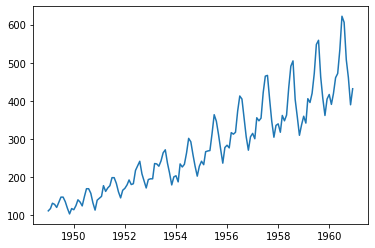

In [53]:
plt.plot(ts.index,ts)  # syntax: plt.plot(x,y)
plt.show()

If we dont explicitly specify the x argument, the `plot()` function will automatically assign the index column of the Series object as x values. You may get some warnings for this way of calling the plot() function of `matplotlib.pyplot`.

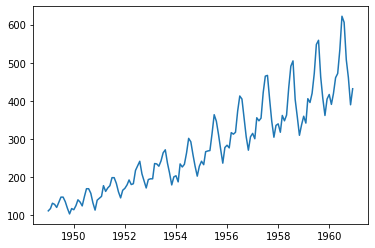

In [54]:
plt.plot(ts) 
plt.show()

You can also plot a sub section of your entire dataset by defining corresponding indexing rule. For example:

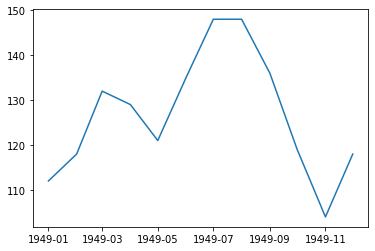

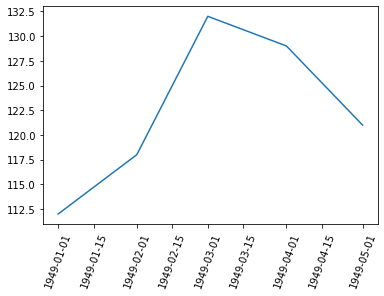

In [55]:
ts1 = ts['1949']
plt.figure()
plt.plot(ts1)
plt.show()

ts2 = ts['1949-01-01':'1949-05-01']
plt.figure()
plt.plot(ts2)
plt.xticks(rotation=70)
plt.show()

At the moment, the plots are not very informative. In the next tutorial, we will learn how to add title, labels, legend to make the plots more informative. 

**Congratulations!** you have learnt the Time Series data preprocessing in Python! In the next tutorial, we will learn the data manipulations in Time Series data.

If you are interested in topic and wish to learn more, the following page is a good start
https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

# Task

## Task 1: Practice with Series
Write a python script to:
- Create a Series of the following names: “david”, “jess”, “mark” and “laura”
- Loop over the list
- Print the name if the user’s name is not “mark”

In [73]:
series_name = pd.Series(['david', 'jess', 'mark','laura'])
series_name

series_name.isin(['mark', 'lama'])
# https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html

0    False
1    False
2     True
3    False
dtype: bool

## Task 2: Practice with date_parser

Download “parse_ex1.csv” and “parse_ex2.csv” from Canvas and then load these 2
datasets, respectively.
You need to store the data into 2 Series variables and then use time information
(the first column in your dataset) as the index.

In [114]:
data1 = pd.read_csv('parse_ex1.csv')
print(data1.head())
print( '\n Data Types:')
print(data1.dtypes)

# data_time = pd.read_csv('AirPassengers.csv')   
data_time = pd.read_csv('parse_ex2.csv')
data_time['Time']=pd.to_datetime(data_time['Time']).dt.date  # COVER THE DATETIME DATA TO DATE !! WITHOUT TIME
data_time.set_index('Time', inplace=True)             # Set the Month column to be the index column
data_time.head()       
# print(data2.head())
# print( '\n Data Types:')
# print(data2.dtypes)



         Date  Sales
0  1949-01-01    172
1  1949-01-02    185

 Data Types:
Date     object
Sales     int64
dtype: object


,Sales
Time,
1949-01-01,112
1949-01-02,118
